In [13]:
import en_core_web_sm
import pandas as pd
import sns as sns

In [14]:
# lemma = nltk.WordNetLemmatizer()
# def lemmatize(data):
#     [lemma.lemmatize(word) for word in data]
#     return data

nlp = en_core_web_sm.load(disable=['ner', 'parser'])
nlp.add_pipe('sentencizer')


def lemmatize(text):
    return " ".join([x.lemma_ for x in nlp(text)])

In [15]:
dataset = pd.read_csv("tagged_data.csv", index_col=[0])
print(dataset.head())

                                              Tweets  cluster
0                        nice warm weather offensive        1
1  people claims changed mind keeps spreading rus...        1
2                    keeps pushing russian narrative        1
3  shows history twitter acocunt id links new old...        1
4     account changed point previous version account        1


In [17]:
# lemmatyzacja
dataset['Tweets'] = dataset['Tweets'].apply(lemmatize)
dataset['Tweets'].head()

0                          nice warm weather offensive
1    people claim change mind keep spread russian n...
2                          keep push russian narrative
3    show history twitter acocunt i d link new old ...
4        account change point previous version account
Name: Tweets, dtype: object

In [19]:
# dzielimy dane
from sklearn.model_selection import train_test_split

X = dataset.Tweets
y = dataset.cluster
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [42]:
import matplotlib.pyplot as plot
def draw_roc(name, prediction):
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    plot.figure()
    plot.title(name)
    plot.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
    plot.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plot.legend(loc="lower right")
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.show()



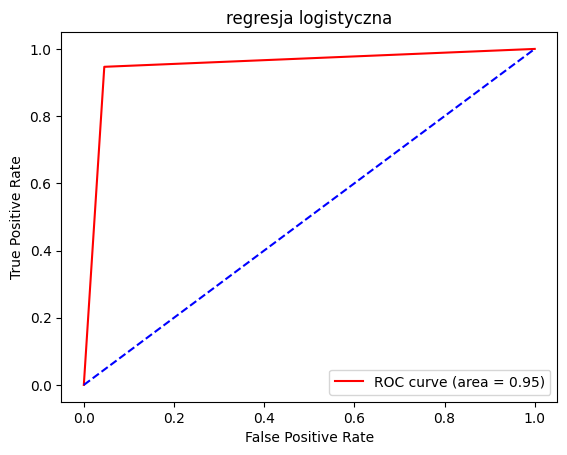

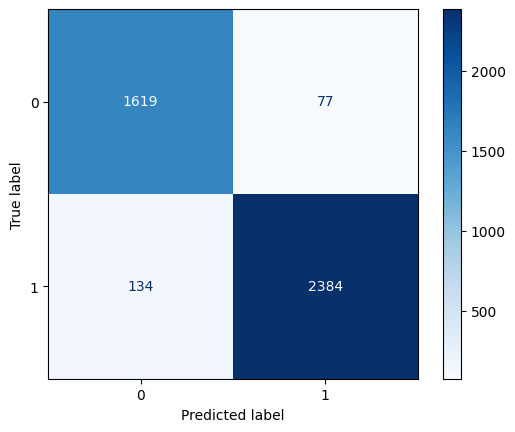

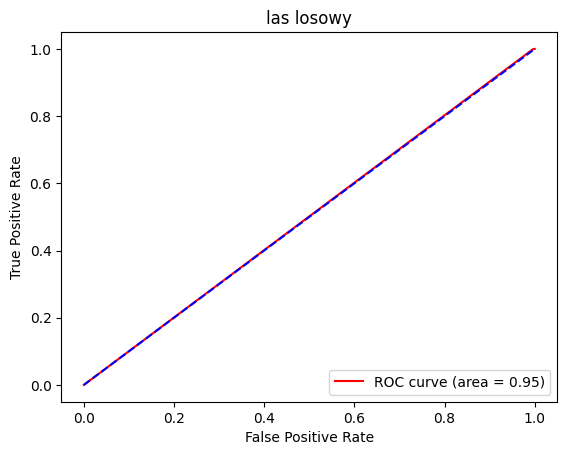

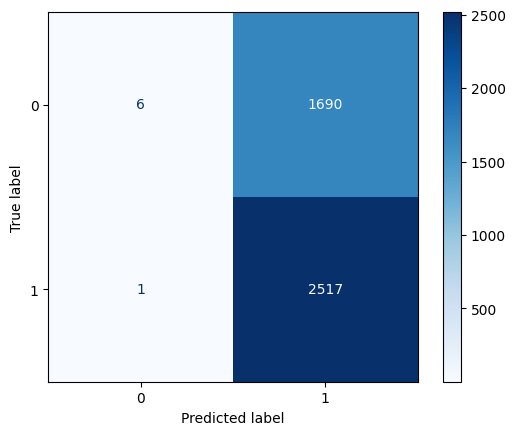

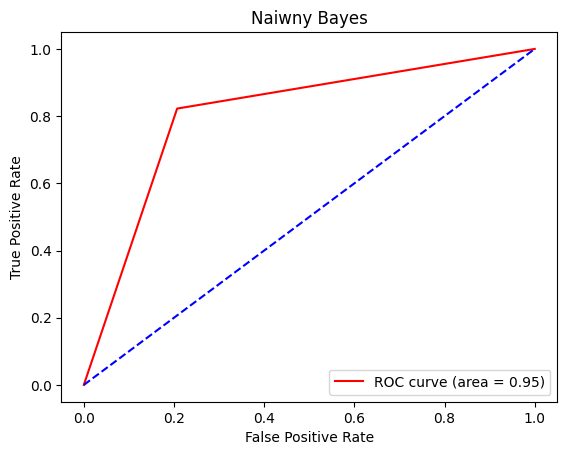

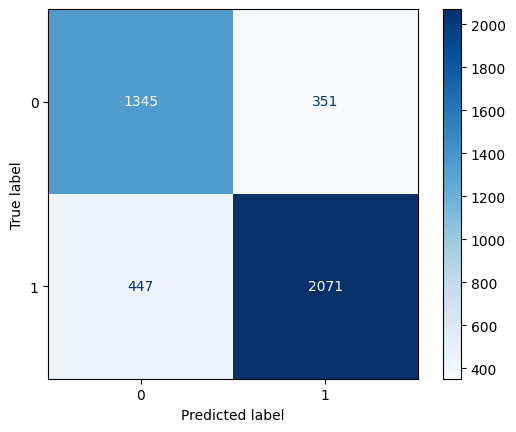

In [63]:
# regresja logistyczna

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plot

pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', LogisticRegression(max_iter=1000))])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)

draw_roc("regresja logistyczna", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plot.cm.Blues)

# las losowy

pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', RandomForestClassifier(max_depth=3, n_estimators=30))])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
draw_roc("las losowy", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plot.cm.Blues)

# naiwny Bayes

pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', MultinomialNB())])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
draw_roc("Naiwny Bayes", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plot.cm.Blues)
